# Corona-Impfungen in Deutschland: Verlauf und Prognose

Überblick über Fallzahlen auf Bundesland- und Landkreis-Ebene: https://experience.arcgis.com/experience/478220a4c454480e823b17327b2bf1d4

Übersichtliche Darstellung der wichtigsten Infos: https://www.corona-in-zahlen.de/

##### Überblick:
-	Bis Ende Februar sollen in ganz Deutschland 8,5 Millionen Impfdosen zur Verfügung stehen (https://twitter.com/BMG_Bund/status/1355428166760886274)
- Hochrechnung der Bundesregierung über Impflieferungen (bisher unbestätigt): 18,5 Mio. in Q1 2021, 77 Mio. in Q2 2021, 125 Mio. in Q3 2021, 100 Mio. in Q4 2021 (https://twitter.com/MEtzold/status/1356249807229222913)


In [1]:
import csv
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import urllib.request
import requests
import matplotlib as mpl
import warnings
from bs4 import BeautifulSoup
from datetime import datetime
pd.options.mode.chained_assignment = None

from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#### Aktueller R-Wert:

In [2]:
r = requests.get("https://www.corona-in-zahlen.de/r-wert/")
doc = BeautifulSoup(r.text, "html.parser")
counter = 0
for card in doc.select(".row .card-title"):
    if counter == 0:
        counter += 1
    elif counter == 1:
        r_wert = card.text
    else:
        print("Problem: Veränderte Website!")
        
print("Aktueller R-Wert Deutschland (7-Tages Durchschnitt): " + str(r_wert))

Aktueller R-Wert Deutschland (7-Tages Durchschnitt): 0,97


## Bisheriger Verlauf der Impfkampagne:

In [3]:
# Einlesen der aktuellesten deutschlandweiten Zeitreihe (RKI)

r = urllib.request.urlopen("https://impfdashboard.de/static/data/germany_vaccinations_timeseries_v2.tsv")
data = r.read().decode().replace("\t",";")
file = open("data.txt", "w")
for line in data:
    file.write(line)
file.close()
data = pd.read_csv("data.txt", delimiter=";",header=0)

# Anpassen von Datentypen

pd.to_numeric(data["dosen_differenz_zum_vortag"], errors="coerce")
data["dosen_differenz_zum_vortag"].iloc[0] = 24080
datum = pd.to_datetime(data["date"])
data["date"] = datum
data.dtypes
data["date"] = data["date"].dt.strftime("%d.%m.%y")

days = np.arange(len(data))
impfungen_kumulativ = np.array(data["dosen_kumulativ"])
a = [0]
for i in impfungen_kumulativ:
    a.append(i)
b = np.array(a)
impfungen_kumulativ = np.append(impfungen_kumulativ,b[0])
c = impfungen_kumulativ - b
tägliche_impfungen = c[c>0]

data["tägliche_impfungen"] = tägliche_impfungen
data["tage_seit_impfstart"] = days
pd.options.display.max_columns = None

In [11]:
# Einlesen der aktuellsten Aufschlüsselung nach Bundesländern (RKI)

url = "https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Impfquotenmonitoring.xlsx;jsessionid=2E9CE964B41ED71B14C434A8B4C94A54.internet052?__blob=publicationFile"
r = requests.get(url)
with open('Impfquotenmonitoring.xlsx', 'wb') as outfile:
    outfile.write(r.content)
data2 = pd.read_excel("Impfquotenmonitoring.xlsx",sheet_name=1,header=[0,1,2])
display(data2)

RS              Bundesland  \
                                   Unnamed: 0_level_1      Unnamed: 1_level_1   
                                   Unnamed: 0_level_2      Unnamed: 1_level_2   
0                                                  08       Baden-Württemberg   
1                                                  09                  Bayern   
2                                                  11                  Berlin   
3                                                  12             Brandenburg   
4                                                  04                  Bremen   
5                                                  02                 Hamburg   
6                                                  06                  Hessen   
7                                                  13  Mecklenburg-Vorpommern   
8                                                  03           Niedersachsen   
9                                                  05     Nordrhein-Westfalen   
10                                                 07         Rheinland-Pfalz   
11                                                 10                Saarland   
12                                                 14                 Sachsen   
13                                                 15          Sachsen-Anhalt   
14                                                 01      Schleswig-Holstein   
15                                                 16               Thüringen   
16                                                NaN                  Bund *   
17                                                NaN                  Gesamt   
18                                                NaN                     NaN   
19  RS: Regionalschlüssel eines jeden Bundeslandes...                     NaN   
20  * Impfungen, die in den bundeseigenen Impfzent...                     NaN   

   Gesamtzahl bisher verabreichter Impfstoffdosen         Erstimpfung  \
                               Unnamed: 2_level_1 Impfungen kumulativ   
                               Unnamed: 2_level_2              Gesamt   
0                                         1075693              735577   
1                                         1410941              954752   
2                                          377427              244174   
3                                          221198              142374   
4                                           75543               51911   
5                                          194559              130462   
6                                          598486              413657   
7                                          155188              100038   
8                                          717259              502310   
9                                         1680571             1152512   
10                                         433083              289934   
11                                         103789               75636   
12                                         400780              282921   
13                                         196059              132389   
14                                         296583              198748   
15                                         224079              148025   
16                                              -                   -   
17                                        8161238             5555420   
18                                            NaN                 NaN   
19                                            NaN                 NaN   
20                                            NaN                 NaN   

                                                                         \
                                Differenz zum Vortag      Impf-quote, %   
   BioNTech Moderna AstraZeneca   Unnamed: 7_level_2 Unnamed: 8_level_2   
0    526428   34115      175034                24540            6.62658   
1    719001   37817      197934                30970 

Geschätzter Bevölkerungsanteil, der für Herdenimmunität nötig ist:

In [5]:
input_herde = widgets.IntSlider(
    value=70,
    min=50,
    max=100,
    step=1,
    description='Eingabe (%):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(input_herde)

IntSlider(value=70, continuous_update=False, description='Eingabe (%):', min=50)

In [6]:
gruppe1 = 8000000 # 80 und älter
gruppe2 = 15630000 # 70 und älter
gruppe3 = 29340000 # 60 und älter
gruppe4 = 83157000 * 0.7

def use(event):
    global gruppe4
    herde = input_herde.value/100
    gruppe4 = int(round(83157000 * herde,0))
    print("Eingabe verwendet! Neuer Wert für Herdenimmunität: " + str(f"{gruppe4:,d}"))

button_herde = widgets.Button(description="Verwenden")
display(button_herde)
button_herde.on_click(use)

Button(description='Verwenden', style=ButtonStyle())

#### Impfgruppen nach Priorität
Quelle: https://www.bundesregierung.de/breg-de/themen/corona-informationen-impfung/corona-impfverordnung-1829940

- Gruppe 1: 80+ Jährige sowie wichtiges Gesundheitspersonal
- Gruppe 2: 70+ Jährige (sowie bestimmte Patientengruppen, hier nicht integriert)
- Gruppe 3: 60+ Jährige sowie Polizei/Feuerwehr/Lehrer/Erzieher
- Gruppe 4: Alle, Herdenimmunität hier als 70% der Gesamtbevölkerung berechnet

Quelle für Altersgruppen: https://www.destatis.de/DE/Presse/Pressemitteilungen/2020/12/PD20_N082_122.html

Schätzungen für Berufsgruppen:
- Wichtiges Gesundheitspersonal: 2,4 Millionen (https://www-genesis.destatis.de/genesis/online?sequenz=tabelleErgebnis&selectionname=23621-0001&zeitscheiben=10#abreadcrumb)
- Polizei (Vollzugsbeamte): 275.000 (https://www.welt.de/politik/deutschland/article170625072/Zahl-der-Polizisten-erreicht-neuen-Hoechststand.html#:~:text=Die%20Zahl%20der%20Polizisten%20in,noch%20%C3%BCber%2010.000%20Stellen%20weniger.)
- Feuerwehr: 33.000 (Hauptberuflich) + 97.000 (Freiwillig) (https://www.feuerwehrverband.de/presse/statistik/#:~:text=2018%20(2017)%20gab%20es%20in,und%20771%20(770)%20Werkfeuerwehren.)
- Lehrer: 800.000 (https://de.statista.com/statistik/daten/studie/201496/umfrage/anzahl-der-lehrer-in-deutschland-nach-bundeslaendern/#:~:text=In%20Deutschland%20gab%20es%20im,und%20Lehrerinnen%20an%20allgemeinbildenden%20Schulen)
- Erzieher: 785.000 (https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Soziales/Kindertagesbetreuung/Tabellen/beschaeftigte-merkmale-2018.html)

Damit ergeben sich folgende (ungefähren) Zahlen (kumuliert) für die Gruppenstärken:

| Impfgruppe | Kumulierte Anzahl |
|---|---|
| 1 | 8.000.000 |
| 1 + 2 | 15.630.000 |
| 1 + 2 + 3 | 29.340.000 |
| Herdenimmunität | 58.210.000 |

#### Sämtliche Daten:

In [7]:
stopper1 = []
def show_data(arg):
    if stopper1 == []:
        display(data)
        stopper1.append(1)
    else:
        pass

button = widgets.Button(description="Anzeigen")
display(button)
button.on_click(show_data)

Button(description='Anzeigen', style=ButtonStyle())



#### Letzter Tag der Aufzeichnungen:



In [8]:
stopper2 = []
def show_last(arg):
    if stopper2 == []:
        latest = data.iloc[-1]
        print(latest)
        stopper2.append(1)
    else:
        pass

button = widgets.Button(description="Anzeigen")
display(button)
button.on_click(show_last)

Button(description='Anzeigen', style=ButtonStyle())

#### Grafische Darstellung des bisherigen Verlaufs

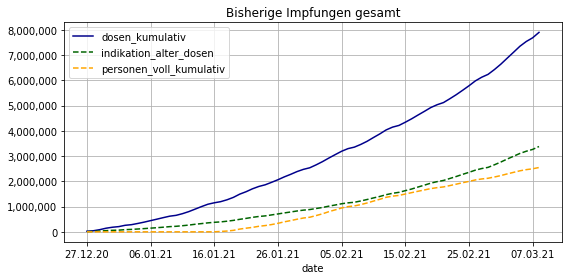

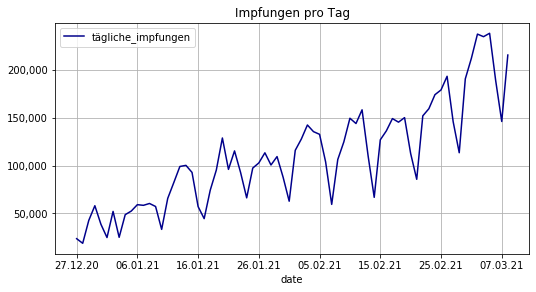

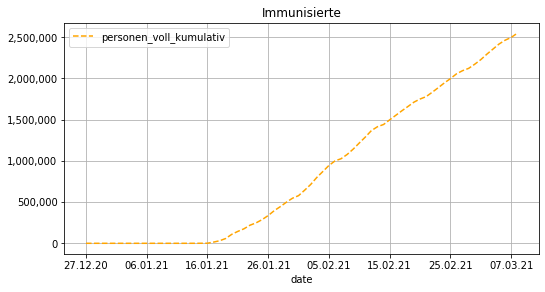

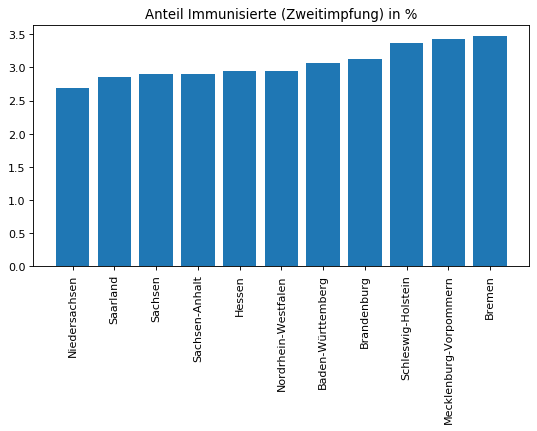

In [13]:
%matplotlib inline
ax=data.plot(kind="line", x="date", y="dosen_kumulativ", color="DarkBlue", figsize=(8, 4))
ax2=data.plot(kind="line", x="date", y="indikation_alter_dosen", linestyle="dashed", color="DarkGreen",ax=ax)
ax=data.plot(kind="line",x="date",y="personen_voll_kumulativ", linestyle="dashed", color="Orange",ax=ax)
plt.title("Bisherige Impfungen gesamt")
plt.grid(True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
#plt.axhline(y=gruppe1, label="Gruppe 1")
plt.tight_layout()
plt.show()

ax=data.plot(kind="line", x="date", y="tägliche_impfungen", color="DarkBlue", figsize=(8.5, 4.25))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Impfungen pro Tag")
plt.grid(True)
plt.show()

ax=data.plot(kind="line",x="date",y="personen_voll_kumulativ", linestyle="dashed", color="Orange", figsize=(8.5, 4.25))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("Immunisierte")
plt.grid(True)
plt.show()

fig = plt.figure(figsize=(8, 4), dpi=80)
#data2['Bevölkerung'] = data2.iloc[:,2]/(data2.iloc[:,7]/100)
data2['Zweitimpfung_quote'] = data2.iloc[:,13]
data2.sort_values(by="Zweitimpfung_quote",inplace=True)
data2.drop(data2.tail(5).index,inplace=True)
plt.bar(x=data2.iloc[:,1],height=data2['Zweitimpfung_quote'])
plt.xticks(x=data2.iloc[:,1], rotation='vertical')
plt.title('Anteil Immunisierte (Zweitimpfung) in %')
plt.show()

## Prognosen über zukünftige Entwicklungen

#### Wichtiger Hinweis: 
Zahlen über Immunisierte werden als Dosen/2 berechnet, was aufgrund der verzögerten Zweitimpfung nicht ganz korrekt ist (für längere Zeithorizonte jedoch recht akkurat sein sollte).

##### Moving Average Prognose (bis August 2021)
Berechnung mittels des gleitenden Durchschnitts der täglichen Impfungen der letzten 7 Tage

In [ ]:
dates_future = pd.date_range(start='2020-12-27', end='2021-8-1')
reps= len(dates_future)

In [ ]:
warnings.filterwarnings("ignore",category=mpl.cbook.mplDeprecation)

rolling_mean = round(data["dosen_differenz_zum_vortag"].rolling(window=7).mean().iloc[-1],-2)

print(" ")
print("Durchschnittliche Tagesimpfungen der letzten 7 Tage: " + str(f"{int(rolling_mean):,d}"))

prognose = list(data["personen_voll_kumulativ"])
while len(prognose) < reps:
    prognose.append(prognose[-1]+rolling_mean/2)

print("")
fig = plt.figure(figsize=(10, 4), dpi=80)
plt.grid(True)
plt.title("Moving Average Prognose: Immunisierte")
ax1 = fig.add_subplot(111)
lines = ax1.plot(dates_future, prognose)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
if prognose[-1] > gruppe1 - 1000000:
    plt.axhline(y=gruppe1, label="Gruppe 1", color="#f5f11d")
if prognose[-1] > gruppe2 - 1000000:
    plt.axhline(y=gruppe2, label="Gruppe 2", color="#f5bb1d")
if prognose[-1] > gruppe3 - 1000000:
    plt.axhline(y=gruppe3, label="Gruppe 3", color="DarkGreen")
plt.legend()
plt.show()
print("")

prognose_end = round(prognose[-1])
print("Immunisierte bis August 2021: " + str(f"{prognose_end:,d}"))
prognose_end = round(prognose[-1])
print("Benötigte Impfdosen bis August 2021: " + str(f"{prognose_end*2:,d}"))

##### Manuelle Prognose (bis Ende 2021)

Benötigte Eingabe: Geschätzte Impfungen pro Tag für die 4 Quartale des Jahres 2021

In [ ]:
dates_future = pd.date_range(start='2020-12-27', end='2022-1-1')
reps= len(dates_future)

input_Q1 = widgets.IntText(description="1. Quartal", value=100000)
input_Q2 = widgets.IntText(description="2. Quartal", value=200000)
input_Q3 = widgets.IntText(description="3. Quartal", value=300000)
input_Q4 = widgets.IntText(description="4. Quartal", value=300000)
display(input_Q1)
display(input_Q2)
display(input_Q3)
display(input_Q4)


start = datetime(2019,12,27)
now = len(data)
Q1 = datetime(2020,3,31)
Q2 = datetime(2020,6,30)
Q3 = datetime(2020,9,30)
Q4 = datetime(2020,12,31)

days_future = list(range(0,reps))

def klick(event):
    prognose2 = list(data["dosen_kumulativ"])
    days_left = len(days_future) - len(days)
    days_future2 = list(range(0,days_left))
    value = prognose2[-1]
    for i in days_future2:
        if i < ((Q1 - start).days - now):
            tägliche_impfungen_geschätzt = input_Q1.value
        elif i < ((Q2 - start).days - now):
            tägliche_impfungen_geschätzt = input_Q2.value
        elif i < ((Q3 - start).days - now):
            tägliche_impfungen_geschätzt = input_Q3.value
        elif i <= ((Q4 - start).days - now):
            tägliche_impfungen_geschätzt = input_Q4.value
        else:
            print("Problem bei der Simulation: Code überprüfen!")
        value += tägliche_impfungen_geschätzt
        prognose2.append(value)
    prognose2 = [i/2 for i in prognose2]
    print("")
    print("")
    print("Prognose für " + str(f"{input_Q1.value:,d}") + " tägl. Impfungen im 1.Quartal | " 
          + str(f"{input_Q2.value:,d}") + " im 2.Quartal | "
          + str(f"{input_Q3.value:,d}") + " im 3.Quartal | "
          + str(f"{input_Q4.value:,d}") + " im 4.Quartal.")
    print("")
    fig = plt.figure(figsize=(10, 4), dpi=80)
    plt.grid(True)
    plt.title("Manuelle Prognose: Immunisierte")
    ax1 = fig.add_subplot(111)
    lines = ax1.plot(dates_future, prognose2)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
    plt.axhline(y=gruppe1, label="Gruppe 1", color="#f5f11d")
    plt.axhline(y=gruppe2, label="Gruppe 2", color="#f5bb1d")
    plt.axhline(y=gruppe3, label="Gruppe 3", color="DarkGreen")
    plt.axhline(y=gruppe4, label="Herdenimmunität", color="Black")
    plt.legend(loc='upper left')
    plt.show()
    print("")
    prognose_end = round(prognose2[-1])
    print("Immunisierte bis Januar 2022: " + str(f"{prognose_end:,d}"))
    prognose_end = round(prognose2[-1]*2)
    print("Benötigte Impfdosen bis Januar 2022: " + str(f"{prognose_end:,d}"))
    print("")
    print("")
    print("")
    
button = widgets.Button(description="Simulieren")
display(button)
button.on_click(klick)